Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to the observed data.
Clearly, it is nothing but an extension of simple linear regression.
Consider a dataset with p features(or independent variables) and one response(or dependent variable). 
Also, the dataset contains n rows/observations.
We define:
X (feature matrix) = a matrix of size n X p where x_{ij} denotes the values of jth feature for ith observation.
So, 
\begin{pmatrix} x_{11} & \cdots & x_{1p} \\ x_{21} & \cdots & x_{2p} \\ \vdots & \ddots & \vdots \\ x_{n1} & \vdots & x_{np} \end{pmatrix}
and
y (response vector) = a vector of size n where y_{i} denotes the value of response for ith observation.
y = \begin{bmatrix} y_1\\ y_2\\ .\\ .\\ y_n \end{bmatrix}
The regression line for p features is represented as: 
h(x_i) = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + .... + \beta_px_{ip}
where h(x_i) is predicted response value for ith observation and b_0, b_1, …, b_p are the regression coefficients.
Also, we can write: 
\newline y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + .... + \beta_px_{ip} + \varepsilon_i \newline or \newline y_i = h(x_i) + \varepsilon_i \Rightarrow \varepsilon_i = y_i - h(x_i)
where e_i represents residual error in ith observation.
We can generalize our linear model a little bit more by representing feature matrix X as: 
X = \begin{pmatrix} 1 & x_{11} & \cdots & x_{1p} \\ 1 & x_{21} & \cdots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \cdots & x_{np} \end{pmatrix}
So now, the linear model can be expressed in terms of matrices as: 
y = X\beta + \varepsilon
where, 
\beta = \begin{bmatrix} \beta_0\\ \beta_1\\ .\\ .\\ \beta_p \end{bmatrix}
and
\varepsilon = \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ .\\ .\\ \varepsilon_n \end{bmatrix}
Now, we determine an estimate of b, i.e. b’ using the Least Squares method.
As already explained, the Least Squares method tends to determine b’ for which total residual error is minimized.
We present the result directly here: 
\hat{\beta} = ({X}'X)^{-1} {X}'y
where ‘ represents the transpose of the matrix while -1 represents the matrix inverse.
Knowing the least square estimates, b’, the multiple linear regression model can now be estimated as:
\hat{y} = X\hat{\beta}
where y’ is the estimated response vector.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics,datasets,linear_model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

[-1.03747356e-01  5.58589924e-02  5.88240770e-02  2.50523544e+00
 -1.90284888e+01  3.25353601e+00 -3.22150522e-03 -1.57603462e+00
  2.58716068e-01 -1.14681299e-02 -1.10777478e+00  5.50051783e-03
 -5.59569992e-01] 45.48141959325114
0.688260714253802


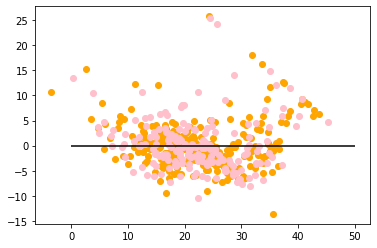

In [16]:
df=datasets.load_boston(return_X_y=False)
x=df.data
y=df.target
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.4,random_state=0)
lr = linear_model.LinearRegression()
lr.fit(xtr,ytr)
print(lr.coef_,lr.intercept_)
print(lr.score(xte,yte))
plt.scatter(lr.predict(xtr),ytr-lr.predict(xtr),color='orange')
plt.scatter(lr.predict(xte),yte-lr.predict(xte),color='pink')
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()